In [ ]:
import pickle
import numpy as np
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
import joblib
from sklearn import linear_model
import xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

scorer = make_scorer(mean_squared_error, greater_is_better=False)

def calculate_rrmse(model, x_test, y_test, y_train):
    preds = model.predict(x_test).ravel()
    y_bar_train = np.mean(y_train)
    naive_sse = sum((y_bar_train - y_test) ** 2)
    model_sse = sum((preds - y_test) ** 2)
    rrmse = 100 * np.sqrt(model_sse / naive_sse)
    return rrmse

def get_results(model):
    print(calculate_rrmse(model, X_train.tocsr(), y_train, y_train))
    print(calculate_rrmse(model, X_val.tocsr(), y_val, y_train))
    print(calculate_rrmse(model, X_test.tocsr(), y_test, y_train))
    return

In [ ]:
with open('pkls/NY_SG_no_review_ratings_x_train.pkl', 'rb') as f:
    X_train = pickle.load(f)

with open('pkls/NY_SG_no_review_ratings_y_train.pkl', 'rb') as f:
    y_train = pickle.load(f)

with open('pkls/NY_SG_no_review_ratings_x_val.pkl', 'rb') as f:
    X_val = pickle.load(f)

with open('pkls/NY_SG_no_review_ratings_y_val.pkl', 'rb') as f:
    y_val = pickle.load(f)

with open('pkls/NY_SG_no_review_ratings_x_test.pkl', 'rb') as f:
    X_test = pickle.load(f)

with open('pkls/NY_SG_no_review_ratings_y_test.pkl', 'rb') as f:
    y_test = pickle.load(f)

# with open('feat_dict.pkl', 'rb') as f:
#     feat_dict = pickle.load(f)

# with open('percent_dict.pkl', 'rb') as f:
#     percent_dict = pickle.load(f)

# reversed_feat_dict = {v: k for k, v in feat_dict.items()}

In [ ]:
with open('NY_x_train.pkl', 'rb') as f:
    X_train = pickle.load(f)

with open('NY_y_train.pkl', 'rb') as f:
    y_train = pickle.load(f)

with open('NY_x_val.pkl', 'rb') as f:
    X_val = pickle.load(f)

with open('NY_y_val.pkl', 'rb') as f:
    y_val = pickle.load(f)

with open('NY_x_test.pkl', 'rb') as f:
    X_test = pickle.load(f)

with open('NY_y_test.pkl', 'rb') as f:
    y_test = pickle.load(f)

with open('NY_feat_dict.pkl', 'rb') as f:
    feat_dict = pickle.load(f)

In [ ]:
X_train.shape

(25039, 6763)

# Multilayer Perceptron (MLP)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping
import numpy as np
import tensorflow as tf
from random import shuffle
import math
import matplotlib.pyplot as plt

In [ ]:
model = Sequential()
model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
cp = ModelCheckpoint('mlpcurr.h5', monitor='val_loss', 
mode = 'min', save_best_only = True)
es = EarlyStopping(monitor='val_loss', patience=10, mode = 'min')

In [ ]:
class SparseSequence(tf.keras.utils.Sequence):
    def __init__(self, x_vals, y_vals, batch_size):
        self.x_vals = x_vals
        self.y_vals = y_vals
        self.inds = list(range(x_vals.shape[0]))
        shuffle(self.inds)
        self.batch_size = batch_size
    def __getitem__(self, item):
        from_ind = self.batch_size * item
        to_ind = self.batch_size * (item + 1)
        return self.x_vals[self.inds[from_ind:to_ind], :].todense(), np.array(self.y_vals)[self.inds[from_ind:to_ind]]
    def on_epoch_end(self):
        shuffle(self.inds)
    def __len__(self):
        return math.ceil(self.x_vals.shape[0] / self.batch_size)

In [ ]:
history = model.fit(SparseSequence(X_train.tocsr(), y_train, 32), epochs=1000,
          validation_data=(SparseSequence(X_val.tocsr(), y_val, 32)), callbacks=[es, cp], 
          verbose = 1)

Epoch 1/1000
783/783 [==============================] - 7s 9ms/step - loss: 0.4711 - val_loss: 0.4220
Epoch 2/1000
783/783 [==============================] - 7s 9ms/step - loss: 0.3702 - val_loss: 0.4163
Epoch 3/1000
783/783 [==============================] - 7s 8ms/step - loss: 0.3238 - val_loss: 0.4036
Epoch 4/1000
783/783 [==============================] - 7s 8ms/step - loss: 0.2958 - val_loss: 0.3879
Epoch 5/1000
783/783 [==============================] - 7s 8ms/step - loss: 0.2731 - val_loss: 0.4152
Epoch 6/1000
783/783 [==============================] - 6s 8ms/step - loss: 0.2519 - val_loss: 0.3811
Epoch 7/1000
783/783 [==============================] - 6s 8ms/step - loss: 0.2283 - val_loss: 0.3801
Epoch 8/1000
783/783 [==============================] - 6s 8ms/step - loss: 0.2155 - val_loss: 0.3921
Epoch 9/1000
783/783 [==============================] - 6s 8ms/step - loss: 0.1969 - val_loss: 0.3842
Epoch 10/1000
783/783 [==============================] - 6s 8ms/step - loss: 0.186

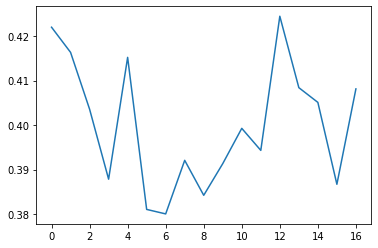

In [ ]:
plt.plot(history.history['val_loss'])

In [ ]:
from keras.models import load_model

model = load_model('mlpcurr.h5')

In [ ]:
model.evaluate(SparseSequence(X_val.tocsr(), y_val, 32))

168/168 [==============================] - 1s 3ms/step - loss: 0.3801


0.38005757331848145

In [ ]:
def calculate_rrmse(model, x_test, y_test, y_train):
    preds = model.predict(x_test).ravel()
    y_bar_train = np.mean(y_train)
    naive_sse = sum((y_bar_train - y_test) ** 2)
    model_sse = sum((preds - y_test) ** 2)
    rrmse = 100 * np.sqrt(model_sse / naive_sse)
    return rrmse

In [ ]:
def convert_sparse_matrix_to_sparse_tensor(X):
    coo = X.tocoo()
    indices = np.mat([coo.row, coo.col]).transpose()
    return tf.sparse.reorder(tf.SparseTensor(indices, coo.data, coo.shape))

In [ ]:
print(calculate_rrmse(model, convert_sparse_matrix_to_sparse_tensor(X_train.tocsr()), y_train, y_train))
print(calculate_rrmse(model, convert_sparse_matrix_to_sparse_tensor(X_val.tocsr()), y_val, y_train))
print(calculate_rrmse(model, convert_sparse_matrix_to_sparse_tensor(X_test.tocsr()), y_test, y_train))

40.46385594696736
59.02799789669425
58.34117356119729


In [ ]:
X = X_train
y = y_train
idxs = list(range(X.shape[0]))
shuffle(idxs)
pred = model.predict(SparseSequence(X.tocsr()[idxs[0]:idxs[0]+1], y[idxs[0]:idxs[0]+1], 1))[0][0]
y_mean = 159.63618651772958
y_sd = 282.11837343969637
pred = pred * y_sd + y_mean
actual = y[idxs[0]:idxs[0]+1].values[0]
actual = actual * y_sd + y_mean
print("Predicted: " + str(pred))
print("Actual: " + str(actual))

Predicted: 31.41874443925539
Actual: 32.0


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2a92d0af-cecf-4cde-96f5-c3db3a7f88f1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>